<a href="https://colab.research.google.com/github/FabianParra24/Apredizaje-Automatico/blob/main/Nayely_Fabian_Tarea4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales Artificiales (ANN)
# Tarea #4 (Grupos de dos integrantes)
## Estudiantes: Nayely Márquez y Fabián Parra



**Datos**

Este dataset se utiliza para predecir si un paciente puede sufrir un accidente cerebrovascular en función de variables como el sexo, la edad, diversas enfermedades y el tabaquismo.


In [3]:
import pandas as pd

data=pd.read_csv('https://raw.githubusercontent.com/FabianParra24/Apredizaje-Automatico/master/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.shape

(5110, 12)

In [5]:
features=["gender","age","hypertension","heart_disease","ever_married","work_type","Residence_type","avg_glucose_level",
          "bmi","smoking_status","stroke"]
data=data[features]

#### Limpieza de datos

Podemos saber si hay otros códigos en gender u otras columnas utilizando:

In [6]:
data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [7]:
data.drop(data[data['gender'] == 'Other'].index, inplace = True)

In [8]:
data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [10]:
data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [11]:
data['hypertension'].unique()

array([0, 1])

In [12]:
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [13]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [14]:
print(data['heart_disease'].isnull().sum())
print(data['avg_glucose_level'].isnull().sum())
print(data['bmi'].isnull().sum())
print(data['stroke'].isnull().sum())

0
0
201
0


In [15]:
data.fillna(data.mean(), inplace = True)

In [16]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.894560,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.698235,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Observemos los datos atípicos

In [17]:
import bokeh as bkh
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import statistics as st


def plot_data(df, col_x, col_y, label_x, label_y, val_title):
    # Imprime gráfica de dispersión. 
    
    plt.figure(figsize=(7,7))
    plt.scatter(x=df[col_x],y=df[col_y])
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(val_title)
    plt.show()
    

Notamos que en relación de age y el nivel de glucosa promedio no encontramos valores extremos, por lo que decidimos no eliminar valores.

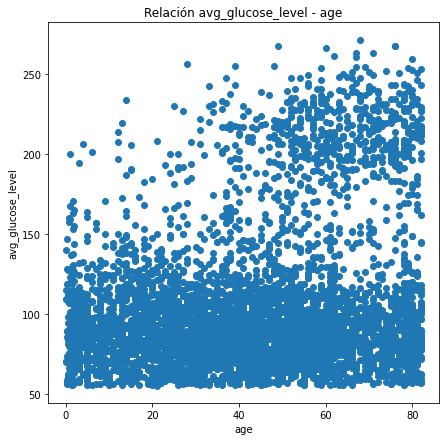

In [18]:
plot_data(data, 'age', 'avg_glucose_level', 'age', 'avg_glucose_level',
          'Relación avg_glucose_level - age') 

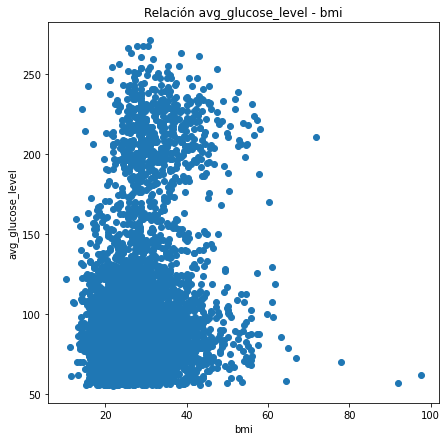

In [19]:
plot_data(data, 'bmi', 'avg_glucose_level', 'bmi', 'avg_glucose_level',
          'Relación avg_glucose_level - bmi')
data=data[data.bmi <=70]

Sin embargo, para la comparacion de los niveles de glucosa y el bmi, si hay algunos valores extremos. Eliminamos los mayores a 70.

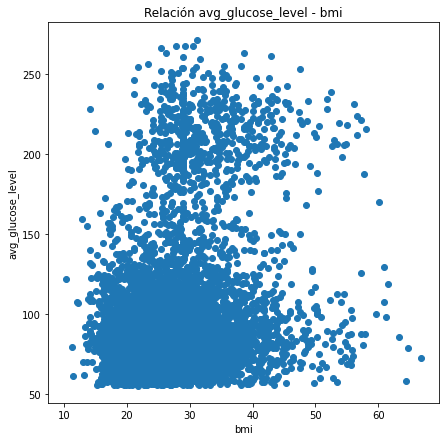

In [20]:
plot_data(data, 'bmi', 'avg_glucose_level', 'bmi', 'avg_glucose_level',
          'Relación avg_glucose_level - bmi')

El gráfico  de calor nos destaca las correlaciones entre todas las variables, donde colores más fuertes representan correlacciones más altas, siendo azul correlación negativa y rojo positiva.

Si queremos crear este gráfico solo es necesario utilizar la función con nuestros datos.

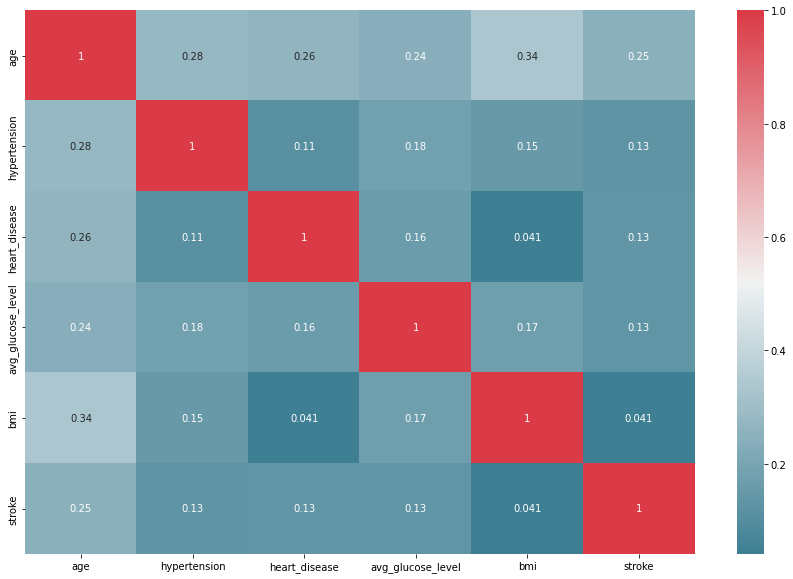

In [21]:
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(data.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(data)

Vemos que no hay correlaciones muy fuertes, asi que no eliminamos ninguna variable.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [23]:
import numpy as np
import tensorflow as tf
import keras
from keras.utils import np_utils

Se realiza el One-hot encode con las X y se normalizan age, avg_glucose_level y bmi.

In [25]:
featuresX=["gender","age","hypertension","heart_disease","ever_married","work_type","Residence_type","avg_glucose_level",
          "bmi","smoking_status"]

processed_dataX=data[featuresX]
processed_dataX= pd.get_dummies(processed_dataX, columns=['gender',"ever_married",'work_type','Residence_type','smoking_status'])
processed_dataX["age"] = processed_dataX["age"]/82
processed_dataX["avg_glucose_level"] = processed_dataX["avg_glucose_level"]/271.74
processed_dataX["bmi"] = processed_dataX["bmi"]/66.8

processed_dataX.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.817073,0,1,0.841577,0.547904,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
1,0.743902,0,0,0.744130,0.432553,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,0.975610,0,1,0.389784,0.486527,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,0.597561,0,0,0.630124,0.514970,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,0.963415,1,0,0.640760,0.359281,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0


In [26]:
# Splitting the data input into X, and the labels y 

X = np.array(processed_dataX)[:,0:]
X = X.astype('float32')
y = tf.keras.utils.to_categorical(data["stroke"],2)

print(y)
print(X)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[0.81707317 0.         1.         ... 1.         0.         0.        ]
 [0.74390244 0.         0.         ... 0.         1.         0.        ]
 [0.9756098  0.         1.         ... 0.         1.         0.        ]
 ...
 [0.42682928 0.         0.         ... 0.         1.         0.        ]
 [0.6219512  0.         0.         ... 1.         0.         0.        ]
 [0.5365854  0.         0.         ... 0.         0.         0.        ]]


In [27]:
# Checking that the input and output look correct
print("Shape of X:", X.shape)
print("\nShape of y:", y.shape)
print("\nFirst 10 rows of X")
print(X[:10])
print("\nFirst 10 rows of y")
print(y[:10])

Shape of X: (5105, 20)

Shape of y: (5105, 2)

First 10 rows of X
[[0.81707317 0.         1.         0.8415765  0.5479042  0.
  1.         0.         1.         0.         0.         1.
  0.         0.         0.         1.         0.         1.
  0.         0.        ]
 [0.74390244 0.         0.         0.74413043 0.4325533  1.
  0.         0.         1.         0.         0.         0.
  1.         0.         1.         0.         0.         0.
  1.         0.        ]
 [0.9756098  0.         1.         0.38978437 0.48652694 0.
  1.         0.         1.         0.         0.         1.
  0.         0.         1.         0.         0.         0.
  1.         0.        ]
 [0.597561   0.         0.         0.6301244  0.51497006 1.
  0.         0.         1.         0.         0.         1.
  0.         0.         0.         1.         0.         0.
  0.         1.        ]
 [0.9634146  1.         0.         0.6407595  0.35928145 1.
  0.         0.         1.         0.         0.      

#### 3. Particion de los datos en training y testing

Se decide realizar la partición con 1021 debido a que es el 20% de nuestros datos.

In [28]:

# break training set into training and validation sets
(X_train, X_test) = X[1021:], X[:1021]
(y_train, y_test) = y[1021:], y[:1021]

# print shape of training set
print('x_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (4084, 20)
4084 train samples
1021 test samples


#### 4. Definición de la arquitectura de la red neuronal:

In [29]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
# Building the model

model = Sequential()

model.add(Dense(128, input_dim=20))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('sigmoid'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2688      
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 11,074
Trainable params: 11,074
Non-trainable params: 0
____________________________________________________

#### 5. Entrenamiento del modelo:

Para el entrenamiento del modelo se define inicialmente epoc=500 y batch size=1000, se disminuyen ambos y se obtiene el mismo accuracy pero una pérdida menor.

In [48]:
# Training the model
model.fit(X_train, y_train, epochs=500, batch_size=1000, verbose=0)

In [49]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

128/128 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000

 Training Accuracy: 1.0
32/32 [==============================] - 0s 1ms/step - loss: 5.9270 - accuracy: 0.7561 

 Testing Accuracy: 0.7561214566230774


In [31]:
model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0)

In [32]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

128/128 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000

 Training Accuracy: 1.0
32/32 [==============================] - 0s 1ms/step - loss: 5.5758 - accuracy: 0.7561 

 Testing Accuracy: 0.7561214566230774


Se procede a realizar un modelo con distinta activación (tanh) y optimizador (rmsprop)

In [33]:
model2 = Sequential()

model2.add(Dense(128, input_dim=20))
model2.add(Activation('tanh'))
model2.add(Dropout(.3)) # now using dropout

model2.add(Dense(64))
model2.add(Activation('tanh'))
model2.add(Dropout(.2)) # now using dropout

model2.add(Dense(32))
model2.add(Activation('tanh'))
model2.add(Dropout(.1)) # now using dropout

model2.add(Dense(2))
model2.add(Activation('sigmoid'))

model2.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               2688      
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)               

El modelo utiliza el mismo epoch y batch del ejemplo anterior debido a que obtuvo una pérdida menor.
Podemos observar que el accuracy se mantiene alto y la pérdida aumenta con respecto al modelo anterior.

In [50]:
model2.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0)

In [51]:
# Evaluating the model on the training and testing set
score = model2.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model2.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

128/128 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000

 Training Accuracy: 1.0
32/32 [==============================] - 0s 1ms/step - loss: 5.9039 - accuracy: 0.7561 

 Testing Accuracy: 0.7561214566230774


In [52]:
m1=model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0,validation_data=(X_test, y_test))
m2=model2.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0,validation_data=(X_test, y_test))

Se grafica el training y validation accuracy de ambos modelos, ambos son practicamente iguales, lo mismo sucede con la pérdida, con un leve aumento en el modelo 1 al aumentar el número de epochs. 

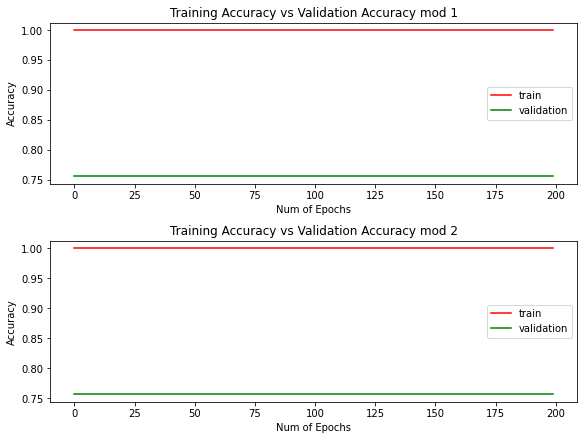

In [60]:

import matplotlib.gridspec as gridspec
fig = plt.figure(constrained_layout=True)

gs = gridspec.GridSpec(2, 3, figure=fig)
fig.add_subplot(gs[0, :])
plt.plot(m1.history['accuracy'],'r')  
plt.plot(m1.history['val_accuracy'],'g')  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy mod 1")  
plt.legend(['train','validation'])

fig.add_subplot(gs[1, :])
plt.plot(m2.history['accuracy'],'r')  
plt.plot(m2.history['val_accuracy'],'g')  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy mod 2")  
plt.legend(['train','validation'])



plt.show()  



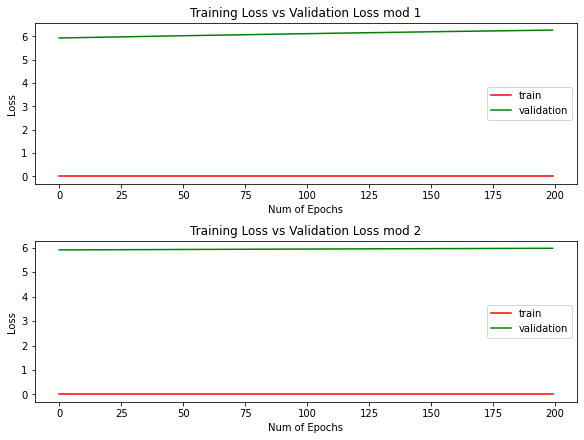

In [61]:

import matplotlib.gridspec as gridspec
fig = plt.figure(constrained_layout=True)

gs = gridspec.GridSpec(2, 3, figure=fig)
fig.add_subplot(gs[0, :]) 
plt.plot(m1.history['loss'],'r')  
plt.plot(m1.history['val_loss'],'g')  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss mod 1")  
plt.legend(['train','validation'])


fig.add_subplot(gs[1, :])  
plt.plot(m2.history['loss'],'r')  
plt.plot(m2.history['val_loss'],'g')  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss mod 2")  
plt.legend(['train','validation'])



Podemos concluir que el modelo tiende al sobre-ajuste por tener un training accuracy tan alto. Esto se puede deber a la gran importancia de los factores de riesgo de los accidentes cerebrovasculares, como Niveles de Glucosa y las Enfermedades Cardíacas.

Finalmente, comparando los resultados con los modelos de la tarea anterior podemos observar que las ANN no son el mejor modelo para estos datos, ya que con Random Forest se obtuvo un AUC alto y no cae en sobre-ajuste.